# Vorlesung: Kopierbeziehungen und machine learning

In [2]:
import pandas as pd
import numpy as np
from random import random,randrange
import matplotlib.pyplot as plt 
import itertools
from IPython.display import HTML
import pygraphviz as pgv

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [3]:
def show2images(pnglist,width):
    res = ''.join(['<iframe src={} width={}% height=400></iframe>'.format(png,width) for png in pnglist])
    return HTML(res)

In [ ]:
def crossProbabilities(model,source,node1,node2):
    index1 = [key for key in index2kanten.keys() if (index2kanten[key][0] in [node1,node2]) & (index2kanten[key][1] in [node1,node2])]
    index2 = [key for key in dictIndex.keys() if (dictIndex[key] in index1)]
    comp_proba = model.predict_proba(source)
    res = [comp_proba[x] for x in index2]
    return res

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Konstruktion Kopierbaum

## Initialisierung

In [4]:
NMerkmale=20
NTexte=15

Die Wurzel beschreibt die Merkmale der grundlegenden Kopiervorlage.

In [5]:
def MWurzel(N):
    return([randrange(2) for i in range(N)])
NM=MWurzel(NMerkmale)
NM

[0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1]

In [7]:
NM2=MWurzel(NMerkmale)
NM2

[0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1]

## Modell der Merkmalskopie

Eingabe ist ein Vektor mit Merkmalen. Angegeben wird die Wahrscheinlichkeit, wie ein Merkmal mit binären Werten kopiert wird.

 Angenommen wird, dass die Wahrscheinlichkeit für die Umwandlung einer null in einer 1 p ist, während die Verwandlung von einem Merkmal mit eins in einen null mit der Häufigkeit q auftritt.
 
 http://stackoverflow.com/questions/10803135/weighted-choice-short-and-simple

In [8]:
# mit den wahrscheinlichkeiten p und q werden die Merkmale 0,1 verändert
def Binaerkopie(m,p,q):
    rd=random()
    if m==0:
        if rd<p:
            w=1
        else:
            w=0
    else:
        if rd<q:
            w=0
        else:
            w=1
    return(w)

In [9]:
def ModelKopie(M,p,q):
    copy=[Binaerkopie(M[i],p,q) for i in range(len(M))]
    return(copy)

In [10]:
# Kopie aus dem Wurzelvektor, mit einer Wahrscheinlichkeit der Merkmalsveränderung von p=0.015 für das Merkmal 0 und prob=0.3 für 1 (Verhältnis: 1/95)
p=0.06
q=0.3
ModelKopie(NM,p,q)

[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1]

# Generierung von Kopierbäumen, mit Aufzeichnung der Kopierpaare

Baut einen direkted graph auf mittels NetworkX Bibliothek.

In [11]:
# dictionary mit allen objekten ID:Merkmalsvektor
d={0:NM}
#paare=[]
G=pgv.AGraph(compound=True,directed=True)  
for i in range(1,NTexte):
    # Zufallsauswahl eines Textes
    pos=randrange(len(d))
    Tsel=d[pos]
    # Kopie des ausgewählen Textes, d[i] ist Merkmalsvektor des i-ten Objekts
    d[i]=ModelKopie(Tsel,p,q)
    # Kopierpaare
    #paare.append({pos:i})
    # Aufbau des Graphen, nodes are not needed when added with edge
    # G.add_node(pos)
    # G.add_node(i)
    G.add_edge(pos,i)

Um die trainierten Klassifizierer zu testen, generieren wir einen neuen Kopierbaum aus einer anderen Wurzel.

In [12]:
test_d={0:NM2}
#paare=[]
G_test=pgv.AGraph(compound=True,directed=True)  
for i in range(1,NTexte):
    # Zufallsauswahl eines Textes
    pos=randrange(len(test_d))
    Tsel=test_d[pos]
    # Kopie des ausgewählen Textes, d[i] ist Merkmalsvektor des i-ten Objekts
    test_d[i]=ModelKopie(Tsel,p,q)
    # Kopierpaare
    #paare.append({pos:i})
    # Aufbau des Graphen, nodes are not needed when added with edge
    # G.add_node(pos)
    # G.add_node(i)
    G_test.add_edge(pos,i)

In [13]:
# das dict aller Objekte mit Merkmalsvektoren ist d
d[0]

[0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1]

In [14]:
d.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

In [15]:
# die gerichteten Kanten sind
Kanten=G.edges()
Kanten[:10]

[('0', '1'),
 ('0', '4'),
 ('0', '6'),
 ('0', '9'),
 ('1', '2'),
 ('1', '3'),
 ('2', '10'),
 ('4', '5'),
 ('4', '13'),
 ('5', '7')]

In [16]:
G.draw('g.png',prog='dot')

In [17]:
G_test.draw('g_test.png',prog='dot')

In [18]:
show2images(['g.png','g_test.png'],50)

# Klassifikationsaufgabe

Klassifikationsaufgaben besteht darin, aus den möglichen Kombinationen aller Knoten die gerichteten Kanten zu identifizieren. Die Lernmenge für  die Klassifikation wird deshalb darin bestehen, aus der Menge der Kombinationen solche Label mit einer direkten Verbindung mit einer eins zu kennzeichnen, während alle anderen Kombinationen eine null erhalten.

Die Merkmale für die Klassifikation besteht aus der Differenz der Merkmalvektor beider gerichteter Paare. Es ergeben sich insgesamt vier Werte, die für jedes Merkmal berechnet werden müssen.

In der Liste Kanten sind alle Kanten. Die Merkmalliste der Objekte haben alle die gleiche Länge. Die Menge alle betrachteten möglichen Kopierpaare ist die Kombination der Objekte mit allen anderen ausser sich selbst. Bei n Objekten ergeben sich somit n*(n-1) Paare.

In [19]:
def diffv(d,i,j): # vergleich zweier Merkmalsvektoren i und j
    d1=d[i] # vektor des ersten objekts
    d2=d[j] # vektor des zweiten objekts
    diffv1=[]
    for u in range(len(d1)): # vergleich der Vektoren
        if d1[u]==0 and d2[u]==0:
            dv=0
        if d1[u]==1 and d2[u]==0:
            dv=1
        if d1[u]==0 and d2[u]==1:
            dv=2
        if d1[u]==1 and d2[u]==1:
            dv=3
        diffv1.append(dv)
    return(diffv1)

def categorie(i,j,Kanten):
    if (str(i),str(j)) in Kanten:
        res = 1
    elif (str(j),str(i)) in Kanten:
        res = 2
    else:
        res = 0
    return res

def Vergleich(d,i,j,Kanten): # vergleich zweier Objekte
    dd=(i,j,diffv(d,i,j),categorie(i,j,Kanten))
    return(dd)

In [20]:
l=[]
for j in range(len(d)):
    for k in range(len(d)):
        if k!=j:
            l.append(Vergleich(d,j,k,Kanten))

Um die Qualität des Klassifierers zu testen, benötigen wir einen zweiten Kopierbaum aus einer anderen Wurzel. Mit diesem können wir dann überprüfen, ob Knoten in untrainierten Daten gefunden werden.

In [21]:
test_l = []
for j in range(len(test_d)):
    for k in range(len(test_d)):
        if k!=j:
            test_l.append(Vergleich(test_d,j,k,Kanten))

In [22]:
dfTest = pd.DataFrame(test_l)
dfTest = dfTest.rename(columns={0:'dia1',1:'dia2',2:'diff', 3:'kopie'})

In [23]:
diffTest = dfTest['diff'].apply(pd.Series)

In [24]:
dfTestAlgo = dfTest.merge(diffTest,left_index=True, right_index=True, how='outer')
dfTestAlgo = dfTestAlgo.drop('diff',axis=1)

In [25]:
dfKanT= list(zip(dfTestAlgo['dia1'],dfTestAlgo['dia2']))
dfKanT = pd.DataFrame([dfKanT]).transpose().rename(columns={0:'Kanten'})
preT = dfKanT.to_dict()

index2kantenTest = preT['Kanten']

In [26]:
XT = dfTestAlgo.drop('kopie',axis=1).drop('dia1',axis=1).drop('dia2',axis=1)

In [27]:
yT = dfTestAlgo['kopie']

## Datensatz erstellen

In [28]:
df = pd.DataFrame(l)
df = df.rename(columns={0:'dia1',1:'dia2',2:'diff', 3:'kopie'})
df.head(3)

,dia1,dia2,diff,kopie
0,0,1,"[0, 3, 3, 1, 0, 0, 3, 3, 0, 2, 0, 2, 3, 3, 3, ...",1
1,0,2,"[0, 1, 3, 1, 0, 0, 3, 3, 0, 2, 0, 2, 3, 3, 1, ...",0
2,0,3,"[0, 3, 3, 1, 0, 0, 3, 3, 0, 2, 0, 2, 3, 3, 3, ...",0


In [29]:
diff = df['diff'].apply(pd.Series)
diff.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,3,3,1,0,0,3,3,0,2,0,2,3,3,3,0,3,1,0,3
1,0,1,3,1,0,0,3,3,0,2,0,2,3,3,1,0,3,1,0,3
2,0,3,3,1,0,0,3,3,0,2,0,2,3,3,3,0,3,1,0,1


In [30]:
dfTrain = df.merge(diff,left_index=True, right_index=True, how='outer')
dfTrain = dfTrain.drop('diff',axis=1)
dfTrain.head(3)

,dia1,dia2,kopie,0,1,2,3,4,5,6,...,10,11,12,13,14,15,16,17,18,19
0,0,1,1,0,3,3,1,0,0,3,...,0,2,3,3,3,0,3,1,0,3
1,0,2,0,0,1,3,1,0,0,3,...,0,2,3,3,1,0,3,1,0,3
2,0,3,0,0,3,3,1,0,0,3,...,0,2,3,3,3,0,3,1,0,1


# ML

* Aufteilung der Simulationsklasse
* Lernen
* Vorhersagen
* Bewerten
* Crossvalidation

## Trainings- und Test-Datensatz erstellen


Zur Rekonstruktion der Baumstruktur generieren wir ein Dict aller möglicher Kanten. Später wird das mit den vorhergesagten Kanten verglichen und daraus eine Baumdarstellung generiert. 

In [31]:
dfKan= list(zip(dfTrain['dia1'],dfTrain['dia2']))
dfKan = pd.DataFrame([dfKan]).transpose().rename(columns={0:'Kanten'})
pre = dfKan.to_dict()
index2kanten = pre['Kanten']

Das Ziel des Trainings ist es, zu entscheiden, ob eine Kopierbeziehung vorliegt oder nicht. Daher trennen wir die Spalte mit der Einordnung ob eine Kopie vorliegt oder nicht, als Label-Vektor ab.

In [32]:
y = dfTrain['kopie']
y.head()

0    1
1    0
2    0
3    1
4    0
Name: kopie, dtype: int64

Da die Namen der Vektoren für die Klassifizierung nicht von Bedeutung sind, schneiden wir diese Spalten ab.

In [33]:
X = dfTrain.drop('kopie',axis=1).drop('dia1',axis=1).drop('dia2',axis=1)
X.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,3,3,1,0,0,3,3,0,2,0,2,3,3,3,0,3,1,0,3
1,0,1,3,1,0,0,3,3,0,2,0,2,3,3,1,0,3,1,0,3
2,0,3,3,1,0,0,3,3,0,2,0,2,3,3,3,0,3,1,0,1


### Balanced datasets

Einige Algorithmen benötigen für das Lernen einen Datensatz mit ausgeglichener Anzahl von Samples für jede Ziel-Klasse (0,1,2). Dieses wird hier erzeugt

In [74]:
dfsample_1_2 = dfTrain[(dfTrain['kopie'] == 1) | (dfTrain['kopie'] == 2)]

In [75]:
dfsample_0 = dfTrain[dfTrain['kopie'] == 0].sample(frac=1).iloc[0:len(dfsample_1_2)]

In [76]:
dfTrain_balanced = pd.concat([dfsample_1_2,dfsample_0]).sample(frac=1)

In [83]:
y_balanced = dfTrain_balanced['kopie']
y_balanced.head(3)

29     2
0      1
114    0
Name: kopie, dtype: int64

In [84]:
X_balanced = dfTrain_balanced.drop('kopie',axis=1).drop('dia1',axis=1).drop('dia2',axis=1)
X_balanced.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
29,0,2,3,0,0,0,3,3,0,3,0,3,3,3,2,0,3,0,0,3
0,0,3,3,1,0,0,3,3,0,2,0,2,3,3,3,0,3,1,0,3
114,0,0,2,0,0,0,2,2,0,2,0,2,2,2,0,0,2,0,0,3


### Aufteilen in Training- und Test-Set

Die Routine train_test_split trennt den vollen Datensatz in Trainings und Test-Datensätze X mit den jeweiligen Label-Vektoren y ab.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [40]:
X_train.shape

(147, 20)

Das Trainingsset hat jetzt keine geordneten Index mehr.

In [41]:
X_train.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
186,0,0,3,3,0,0,3,0,0,0,0,1,3,0,2,0,3,3,0,3
191,0,2,1,3,0,0,3,2,0,0,0,1,3,2,0,0,1,1,0,3
12,0,1,3,3,0,0,3,1,0,0,0,2,3,1,1,0,3,3,0,3


In [42]:
X_test.shape

(63, 20)

## k-nearest Neighbor Classifier

Parameters and method definition : http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier

Possible metrics include hamming,canberra, braycurtis for integer valued vectors.

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [266]:
neigh = KNeighborsClassifier(n_neighbors=4, weights='distance',metric='minkowski',p=3,leaf_size=25)

neigh.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=25, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=3,
           weights='distance')

In [267]:
metrics.mean_absolute_error(y_test, neigh.predict(X_test))

0.15873015873015872

In [268]:
scores_neigh = cross_val_score(neigh, X, y, cv=5)#,scoring='accuracy')

In [269]:
scores_neigh

array([ 0.86046512,  0.8372093 ,  0.83333333,  0.85714286,  0.825     ])

In [270]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_neigh.mean(), scores_neigh.std() * 2))

Accuracy: 0.84 (+/- 0.03)


In [271]:
testNeigh=pgv.AGraph(compound=True,directed=True)  

predictionSource = X
dcIndex = predictionSource.index
dictIndex = {i:dcIndex[i] for i in range(len(list(dcIndex)))}

comp = neigh.predict(predictionSource)
#comp = y
print(comp.sum())

for i in range(len(comp)):
    if comp[i] == 1:
        key1 = dictIndex[i]
        testNeigh.add_edge(index2kanten[key1])
    elif comp[i] == 2:
        key1 = dictIndex[i]
        order = index2kanten[key1]
        testNeigh.add_edge((order[1],order[0]))
    else:
        pass

31


In [272]:
testNeigh.draw('testNeigh.png',prog='dot')

In [273]:
show2images(['testNeigh.png','g.png'],50)

### Nicht entscheidbare Fälle

Bei manchen Graphen gibt Fälle von Kopierbeziehungen, bei denen der Algorithmus nicht entscheiden kann, welche Kopier-Richtung vorliegt.
Dies ist mit zwei entgegengesezten Pfeilen kenntlich gemacht.
Wir können uns die Wahrscheinlichkeiten des trainierten Modells mit neigh.predict_proba(X) ausgeben lassen.

In [275]:
crossProbabilities(neigh,X,7,8)

[array([ 0.,  0.,  1.]), array([ 0.,  0.,  1.])]

Findet der Algorithmus für beide Richtunge eine 50/50 Wahrscheinlichkeit, liegen vermutlich identische Vektoren vor. Dies kann anhand des dictionaries der Vektoren überprüft werden.  

In [276]:
d[8]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [277]:
d[7]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

## Decision Tree Classifier

Decision Tree Classifieres: Create biased trees if some classes dominate. -> Balance dataset

In [278]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [280]:
dtree = DecisionTreeClassifier(max_depth=10,max_features=5,criterion='gini',splitter='random',class_weight={0:0.99,1:1.02,2:1.02})

In [281]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.99, 1: 1.02, 2: 1.02},
            criterion='gini', max_depth=10, max_features=5,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')

In [282]:
export_graphviz(dtree, feature_names=X_train.columns,out_file='tree.dot')

In [283]:
!dot -Tpng tree.dot -o tree.png

In [284]:
show2images(["tree.png"],70)

In [285]:
metrics.mean_absolute_error(y_test, dtree.predict(X_test))

0.23809523809523808

In [286]:
scores_dtree = cross_val_score(dtree, X, y, cv=5)
scores_dtree

array([ 0.79069767,  0.74418605,  0.69047619,  0.76190476,  0.825     ])

In [287]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_dtree.mean(), scores_dtree.std() * 2))

Accuracy: 0.76 (+/- 0.09)


In [288]:
testDtree=pgv.AGraph(compound=True,directed=True)  

predictionSource = X
dcIndex = predictionSource.index
dictIndex = {i:dcIndex[i] for i in range(len(list(dcIndex)))}

compDtree = dtree.predict(predictionSource)
print(compDtree.sum())

for i in range(len(compDtree)):
    if compDtree[i] == 1:
        key1 = dictIndex[i]
        testDtree.add_edge(index2kanten[key1])
    elif compDtree[i] == 2:
        key1 = dictIndex[i]
        order = index2kanten[key1]
        testDtree.add_edge((order[1],order[0]))
    else:
        pass

33


In [289]:
testDtree.draw('testDtree.png',prog='dot')

In [290]:
show2images(['testDtree.png','g.png'],50)

In [291]:
crossProbabilities(dtree,X,0,9)

[array([ 0.,  1.,  0.]), array([ 0.,  1.,  0.])]

In [292]:
d[0]

[0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1]

In [293]:
d[9]

[0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1]

In [294]:
model_score = dtree.score(X_test, y_test)
print ("Model Score %.2f \n" % (model_score))

y_predict = dtree.predict(X)

print ("Confusion Matrix")
confusion_matrix = metrics.confusion_matrix(y, y_predict)
confusion_matrix

Model Score 0.84 

Confusion Matrix


array([[179,   2,   1],
       [  3,  10,   1],
       [  5,   1,   8]])

## Random Forest Classifier

In [295]:
from sklearn.ensemble import RandomForestClassifier

In [477]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [478]:
rf = RandomForestClassifier(n_estimators=35, criterion='gini', n_jobs=4, max_depth=None,max_features=5,oob_score=True,class_weight={0:0.99,1:1.02,2:1.02})

In [479]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True,
            class_weight={0: 0.99, 1: 1.02, 2: 1.02}, criterion='gini',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=35, n_jobs=4, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [480]:
metrics.mean_absolute_error(y_test, rf.predict(X_test))

0.15873015873015872

Cross-validation dauert bei Random forest etwas. Ca. 30sec.

In [481]:
scores_rf = cross_val_score(rf, X_test, y_test, cv=5)

/root/anaconda3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [482]:
scores_rf

array([ 0.78571429,  0.84615385,  0.84615385,  0.91666667,  1.        ])

In [483]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_rf.mean(), scores_rf.std() * 2))

Accuracy: 0.88 (+/- 0.15)


In [492]:
testRandomF=pgv.AGraph(compound=True,directed=True)  

predictionSource = X_test
dcIndex = predictionSource.index
dictIndex = {i:dcIndex[i] for i in range(len(list(dcIndex)))}

compRandomF = rf.predict(predictionSource)

for i in range(len(compRandomF)):
    if compRandomF[i] ==1:
        iList.append(i)
        testRandomF.add_edge(index2kanten[dictIndex[i]])
    elif compRandomF[i] == 2:
        key1 = dictIndex[i]
        order = index2kanten[key1]
        testRandomF.add_edge((order[1],order[0]))
    else:
        pass

In [493]:
compRandomF.sum()

6

In [494]:
testRandomF.draw('testRandomF.png',prog='dot')

In [495]:
show2images(['testRandomF.png','g.png'],50)

### Bewertung der Klassifizierung über Confusions Matrix

In [488]:
model_score = rf.score(X_test, y_test)
print ("Model Score %.2f \n" % (model_score))

y_predict = rf.predict(X_test)

print ("Confusion Matrix")
confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
confusion_matrix

Model Score 0.87 

Confusion Matrix


array([[55,  0,  1],
       [ 3,  0,  1],
       [ 1,  2,  0]])

In [489]:
%matplotlib notebook

<IPython.core.display.Javascript object>


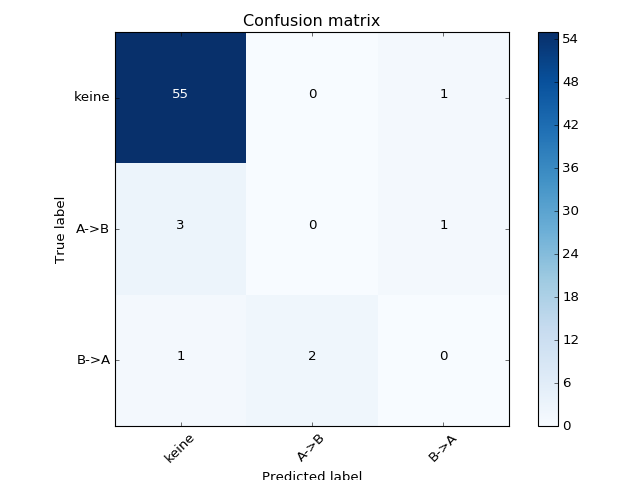

Confusion matrix, without normalization
[[55  0  1]
 [ 3  0  1]
 [ 1  2  0]]


In [491]:
plot_confusion_matrix(confusion_matrix, classes=['keine','A->B','B->A'])

## Testen des trainierten Klassifizierers an neuem Kopierbaum (mit unterschiedlicher Wurzel!)

In [497]:
testRandomFTest = pgv.AGraph(compound=True,directed=True)  
iList = []

predictionSource = XT
dcIndex = predictionSource.index
dictIndex = {i:dcIndex[i] for i in range(len(list(dcIndex)))}

compRandomFTest = rf.predict(predictionSource)

for i in range(len(compRandomFTest)):
    if compRandomFTest[i] ==1:
        iList.append(i)
        testRandomFTest.add_edge(index2kantenTest[dictIndex[i]])
    elif compRandomFTest[i] == 2:
        key1 = dictIndex[i]
        order = index2kantenTest[key1]
        testRandomFTest.add_edge((order[1],order[0]))
    else:
        pass
    
testRandomFTest.draw('testRandomFTest.png',prog='dot')

show2images(['testRandomFTest.png','g_test.png'],50)

## Suport vector machines

In [498]:
from sklearn.svm import SVC

In [553]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [560]:
svc_rbf = SVC(class_weight='balanced')

In [561]:
svc_rbf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [562]:
model_score = svc_rbf.score(X_test,y_test)
print ("Model Score %.2f \n" % (model_score))

Model Score 0.74 



In [563]:
metrics.mean_absolute_error(y_test, svc_rbf.predict(X_test))

0.33333333333333331

In [567]:
testSVC=pgv.AGraph(compound=True,directed=True)  

predictionSource = X_test
dcIndex = predictionSource.index
dictIndex = {i:dcIndex[i] for i in range(len(list(dcIndex)))}

compSVC = svc_rbf.predict(predictionSource)

for i in range(len(compSVC)):
    if compSVC[i] ==1:
        iList.append(i)
        testSVC.add_edge(index2kanten[dictIndex[i]])
    elif compSVC[i] == 2:
        key1 = dictIndex[i]
        order = index2kanten[key1]
        testSVC.add_edge((order[1],order[0]))
    else:
        pass

In [568]:
compSVC

array([0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0])

In [569]:
testSVC.draw('testSVC.png',prog='dot')

show2images(['testSVC.png','g.png'],50)